# Loading Dataset

In [1]:
import pandas as pd # Helps to read, organize and manipulate data
import numpy as np # is used to for mathematical calculations
import matplotlib.pyplot as plt #used to plot graphs
import seaborn as sns #used for data visualization

# Random seed
# In here this makes sure the results are consistent every time the code runs
SEED = 412122
np.random.seed(SEED)

# Load dataset
data = pd.read_csv("dataset.txt", sep=r'\s+', header=None) # '\s+' tells pandas to split the data using spaces heder none means there is no column title in the file
targets = pd.read_csv("targets.txt", header=None)

# Activities
features = pd.read_csv("features.txt", sep=r'\s+', header=None, usecols=[1])
features = features.squeeze().tolist() # converts the column into a simple list of names

# Assign feature names to the dataset using names from features.txt
data.columns = features

# Mapping target labels to activity names
activity_labels = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

# Numeric labels with activity names
targets[0] = targets[0].map(activity_labels)

# Verifying the data
print("Dataset:")
print(data.head())

print("\nMapped Targets:")
print(targets.head())

# The program has a lot of data that tell us how people move ( like walking, sitting, etc.) Here reads these numbers from files and give them names so it  knows what they mean.

Dataset:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBo

## Examination of the data and adding prints to visualize data loaded

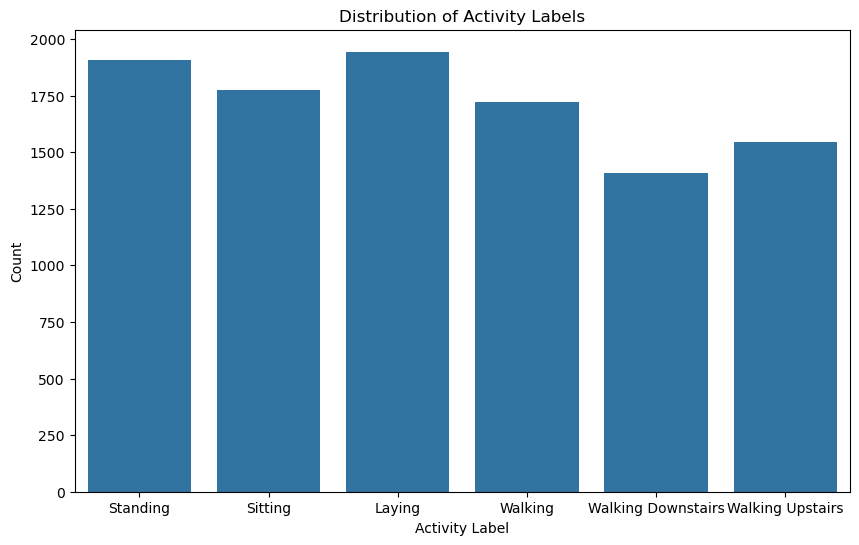

In [2]:
# Here it creates a bar chart that shows how many examples we have of each activity type.
# Distribution of activities
plt.figure(figsize=(10, 6))
sns.countplot(x=targets[0])
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

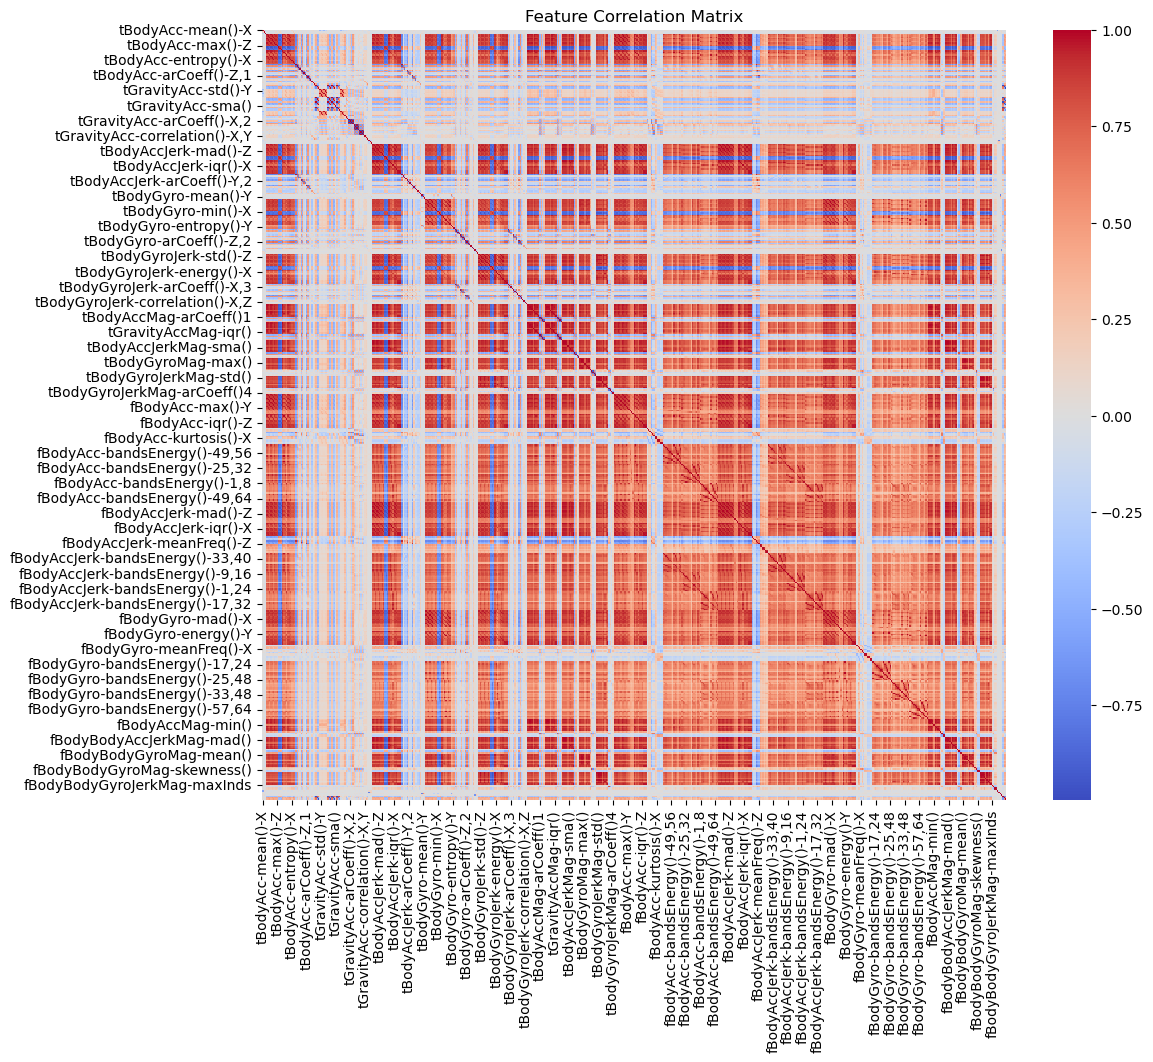

In [3]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Missing values in each column:
 Series([], dtype: int64)


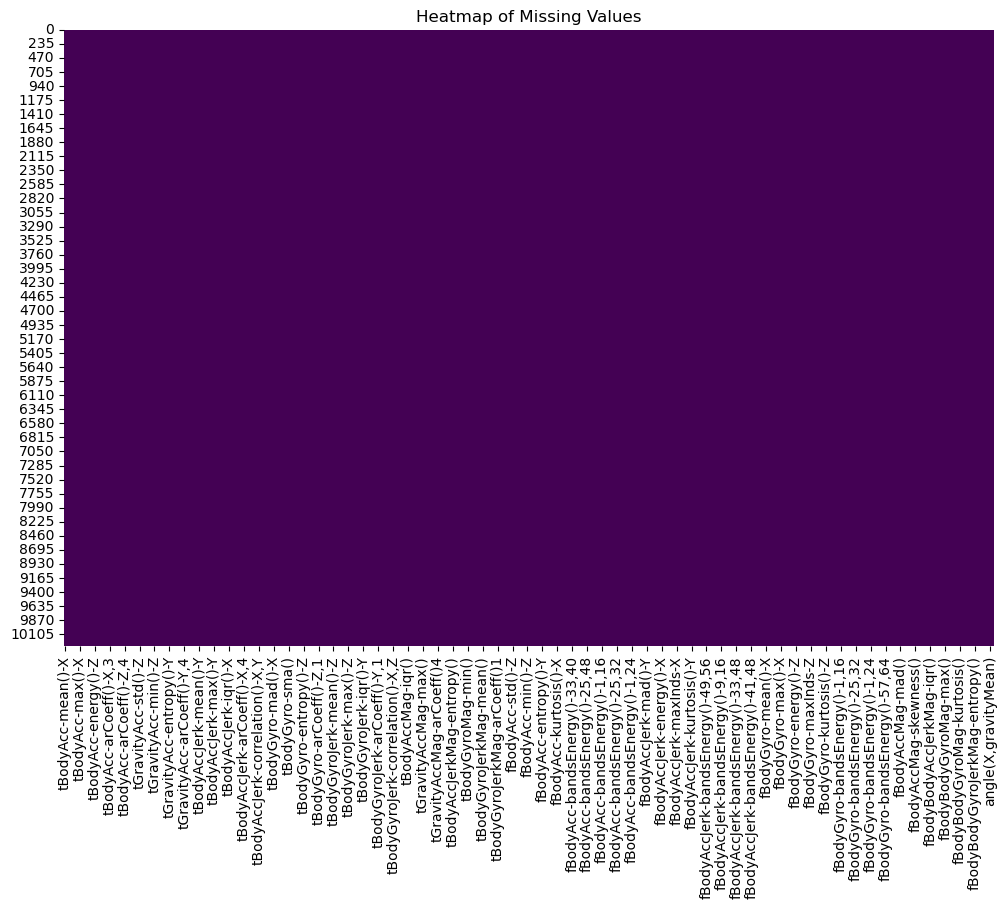

In [ ]:
# Checking for missing values using a heatmap
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Visualizing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Class distribution:
 0
Laying                1944
Standing              1906
Sitting               1777
Walking               1722
Walking Upstairs      1544
Walking Downstairs    1406
Name: count, dtype: int64


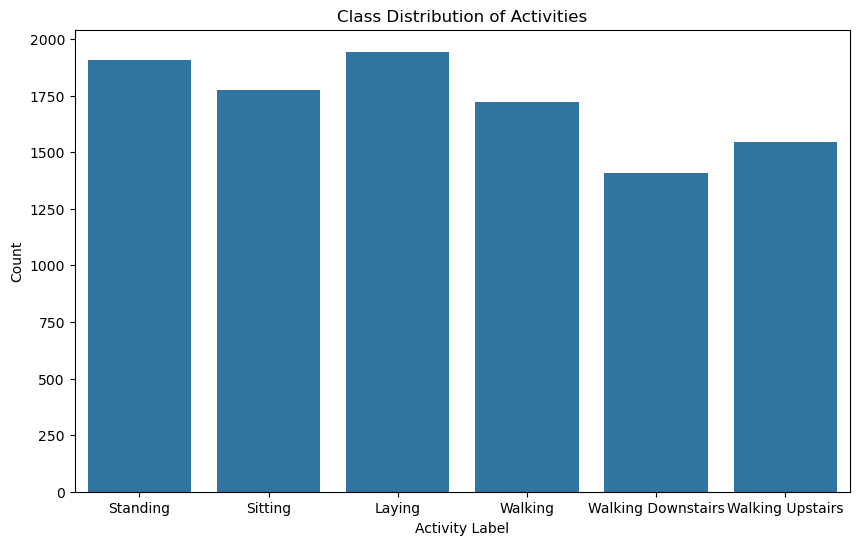

In [5]:

# Checking for class imbalance
class_counts = targets[0].value_counts()
print("Class distribution:\n", class_counts)

# Visualization class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=targets[0])
plt.title('Class Distribution of Activities')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()


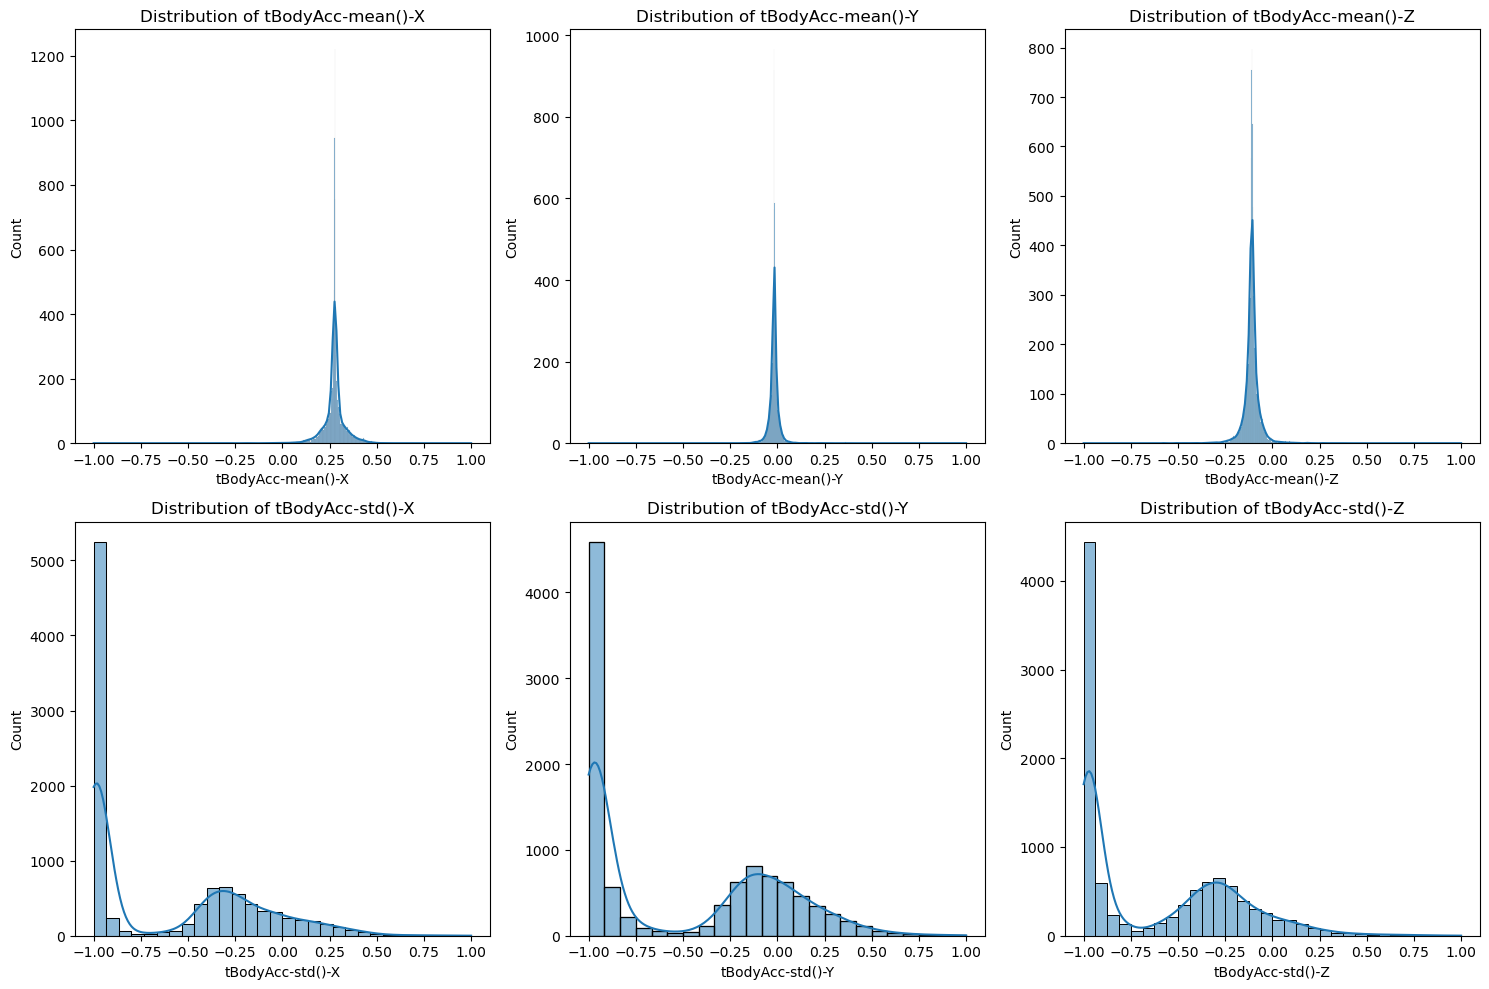

In [6]:
# Distribution of some features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Preprocessing the Data

Here the program mixes up the number sso they are in a random order.
Splits the numbers into two groups: one for learning(training) and one for testing.
Makes sure all the numbers are on the same scale so they are easier to compare.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Shuffling data
# here we suffle the dataset to prevent any ordre bias. We then split 70% of the data for training and 30% for testing/
shuffled_indices = np.random.permutation(len(data))
train_size = int(0.7 * len(data))

train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

train_data, test_data = data.iloc[train_indices], data.iloc[test_indices]
train_labels, test_labels = targets.iloc[train_indices], targets.iloc[test_indices]

# Scale the features
# This improves the accuracy of the ML model by scaling the values of the features to the same range.
# This is important because some features may have a wider range of values than others.
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)



# Verifying shape
print("Train data shape:", train_data_scaled.shape)
print("Test data shape:", test_data_scaled.shape)

Train data shape: (7209, 561)
Test data shape: (3090, 561)


# Initializing Models

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initializing models
# Here we are initializing the models that we will use to train the data.
# We are using the following models: Support Vector Machine with linear kernel, Support Vector Machine with RBF kernel, K-Nearest Neighbors, Random Forest and Logistic Regression.
svm_linear = SVC(kernel='linear', random_state=SEED) # to seperate activites
svm_rbf = SVC(kernel='rbf', random_state=SEED) # looks at the "closest neighbors" to classify an activity
knn_model = KNeighborsClassifier(n_neighbors=5) # Classifies based on the k-nearest neighbors
rf_model = RandomForestClassifier(n_estimators=500, random_state=SEED)
log_reg = LogisticRegression(max_iter=500, random_state=SEED) 

The program uses different methods(models initiazlized in the cell above) to learn from the numbers. These methods are like different ways to gues what activity is happening.

# Training and Evaluating Models

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
svm_linear_score = cross_val_score(svm_linear, train_data_scaled, train_labels.values.ravel(), cv=5).mean() # Here we train each model 5x and take the avg accuracy
svm_rbf_score = cross_val_score(svm_rbf, train_data_scaled, train_labels.values.ravel(), cv=5).mean() # we train the model on train_data_scaled and predict activities for test_data_scaled
knn_score = cross_val_score(knn_model, train_data_scaled, train_labels.values.ravel(), cv=5).mean()
rf_score = cross_val_score(rf_model, train_data_scaled, train_labels.values.ravel(), cv=5).mean()
log_reg_score = cross_val_score(log_reg, train_data_scaled, train_labels.values.ravel(), cv=5).mean()

# Results
print("SVM (Linear) Accuracy:", svm_linear_score)
print("SVM (RBF) Accuracy:", svm_rbf_score)
print("kNN Accuracy:", knn_score)
print("Random Forest Accuracy:", rf_score)
print("Logistic Regression Accuracy:", log_reg_score)

# Models trained on the entire training & predictions made on test set

In [ ]:
# Training the models
svm_linear.fit(train_data_scaled, train_labels.values.ravel())
svm_rbf.fit(train_data_scaled, train_labels.values.ravel())
knn_model.fit(train_data_scaled, train_labels.values.ravel())
rf_model.fit(train_data_scaled, train_labels.values.ravel())
log_reg.fit(train_data_scaled, train_labels.values.ravel())

# Predictions
svm_linear_predictions = svm_linear.predict(test_data_scaled)
svm_rbf_predictions = svm_rbf.predict(test_data_scaled)
knn_predictions = knn_model.predict(test_data_scaled)
rf_predictions = rf_model.predict(test_data_scaled)
log_reg_predictions = log_reg.predict(test_data_scaled)

print("SVM (Linear) Predictions:")
print(svm_linear_predictions)
print("\nSVM (RBF) Predictions:")
print(svm_rbf_predictions)
print("\nkNN Predictions:")
print(knn_predictions)
print("\nRandom Forest Predictions:")
print(rf_predictions)
print("\nLogistic Regression Predictions:")
print(log_reg_predictions)

c:\Users\Neo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM (Linear) Predictions:
['Standing' 'Laying' 'Standing' ... 'Standing' 'Walking' 'Standing']

SVM (RBF) Predictions:
['Standing' 'Laying' 'Standing' ... 'Standing' 'Walking' 'Standing']

kNN Predictions:
['Standing' 'Laying' 'Sitting' ... 'Standing' 'Walking' 'Standing']

Random Forest Predictions:
['Standing' 'Laying' 'Standing' ... 'Standing' 'Walking' 'Standing']

Logistic Regression Predictions:
['Standing' 'Laying' 'Standing' ... 'Standing' 'Walking' 'Standing']


# Analyzing Results

Here we can find out wich method is the best at guessing the activites concluding that the Random Forest method is the best at guessing correctly.


SVM (Linear) Test Accuracy: 0.9809061488673139
SVM (Linear) Classification Report:
                     precision    recall  f1-score   support

            Laying       1.00      1.00      1.00       598
           Sitting       0.94      0.96      0.95       534
          Standing       0.96      0.94      0.95       581
           Walking       1.00      1.00      1.00       510
Walking Downstairs       1.00      1.00      1.00       430
  Walking Upstairs       1.00      1.00      1.00       437

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



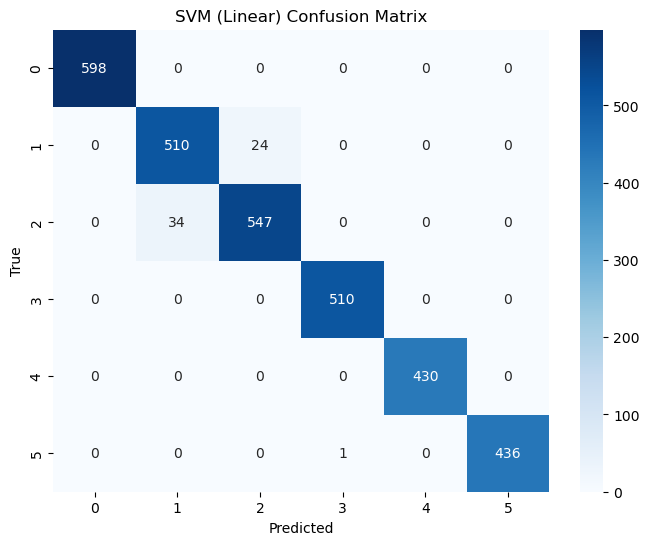

SVM (RBF) Test Accuracy: 0.976051779935275
SVM (RBF) Classification Report:
                     precision    recall  f1-score   support

            Laying       1.00      1.00      1.00       598
           Sitting       0.93      0.95      0.94       534
          Standing       0.95      0.93      0.94       581
           Walking       1.00      1.00      1.00       510
Walking Downstairs       0.99      1.00      0.99       430
  Walking Upstairs       1.00      0.99      1.00       437

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



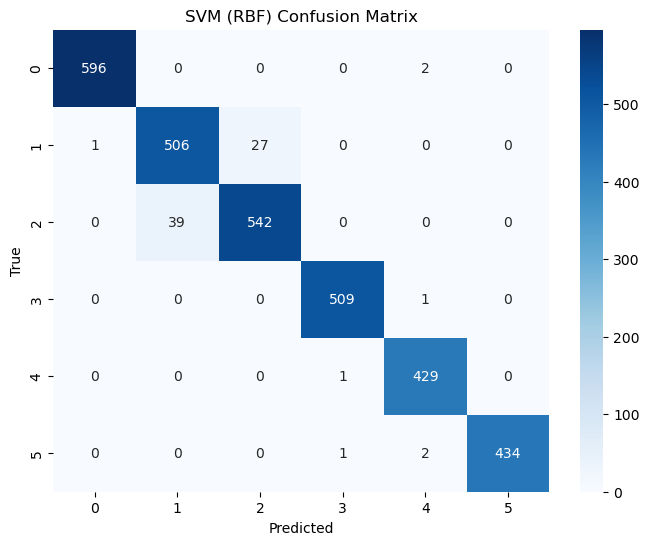

kNN Test Accuracy: 0.9601941747572815
kNN Classification Report:
                     precision    recall  f1-score   support

            Laying       1.00      0.99      1.00       598
           Sitting       0.92      0.89      0.91       534
          Standing       0.90      0.93      0.92       581
           Walking       0.97      1.00      0.98       510
Walking Downstairs       1.00      0.96      0.98       430
  Walking Upstairs       0.98      0.99      0.99       437

          accuracy                           0.96      3090
         macro avg       0.96      0.96      0.96      3090
      weighted avg       0.96      0.96      0.96      3090



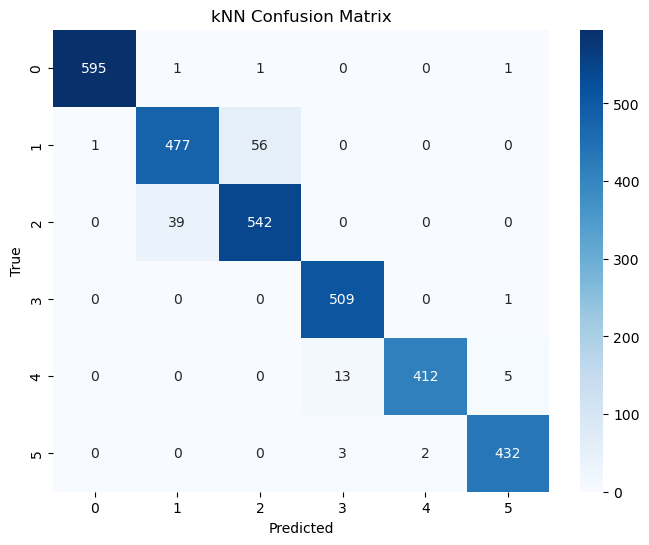

Random Forest Test Accuracy: 0.9731391585760518
Random Forest Classification Report:
                     precision    recall  f1-score   support

            Laying       1.00      1.00      1.00       598
           Sitting       0.95      0.96      0.95       534
          Standing       0.96      0.95      0.96       581
           Walking       0.99      0.98      0.98       510
Walking Downstairs       0.97      0.97      0.97       430
  Walking Upstairs       0.97      0.99      0.98       437

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



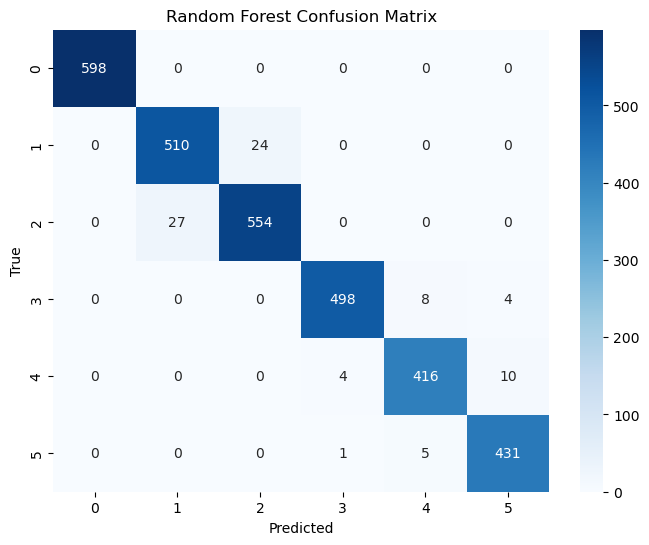

Logistic Regression Test Accuracy: 0.9815533980582525
Logistic Regression Classification Report:
                     precision    recall  f1-score   support

            Laying       1.00      1.00      1.00       598
           Sitting       0.94      0.97      0.95       534
          Standing       0.97      0.94      0.95       581
           Walking       1.00      1.00      1.00       510
Walking Downstairs       1.00      1.00      1.00       430
  Walking Upstairs       1.00      1.00      1.00       437

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



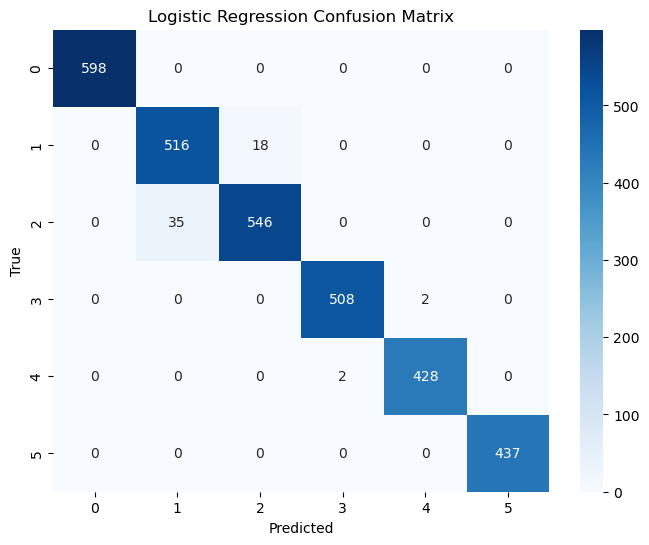

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate SVM (Linear)
print("SVM (Linear) Test Accuracy:", accuracy_score(test_labels, svm_linear_predictions))
print("SVM (Linear) Classification Report:\n", classification_report(test_labels, svm_linear_predictions))
plot_confusion_matrix(test_labels, svm_linear_predictions, "SVM (Linear) Confusion Matrix")

# Evaluate SVM (RBF)
print("SVM (RBF) Test Accuracy:", accuracy_score(test_labels, svm_rbf_predictions))
print("SVM (RBF) Classification Report:\n", classification_report(test_labels, svm_rbf_predictions))
plot_confusion_matrix(test_labels, svm_rbf_predictions, "SVM (RBF) Confusion Matrix")

# Evaluate kNN
print("kNN Test Accuracy:", accuracy_score(test_labels, knn_predictions))
print("kNN Classification Report:\n", classification_report(test_labels, knn_predictions))
plot_confusion_matrix(test_labels, knn_predictions, "kNN Confusion Matrix")

# Evaluate Random Forest
print("Random Forest Test Accuracy:", accuracy_score(test_labels, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(test_labels, rf_predictions))
plot_confusion_matrix(test_labels, rf_predictions, "Random Forest Confusion Matrix")

# Evaluate Logistic Regression
print("Logistic Regression Test Accuracy:", accuracy_score(test_labels, log_reg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(test_labels, log_reg_predictions))
plot_confusion_matrix(test_labels, log_reg_predictions, "Logistic Regression Confusion Matrix")